# Face recognition DeepFace

In [23]:
%load_ext autoreload
%autoreload 2

# put system imports here
import os
import sys
from os.path import join
from glob import glob
from pathlib import Path
import random
import time

# put pip/conda installed imports here
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import imutils
import cv2 as cv
import matplotlib.pyplot as plt
from deepface import DeepFace
from PIL import Image

# put local imports here
fp_app_root = join(Path(os.getcwd()).parent)
sys.path.append(fp_app_root)
from app.settings import app_cfg
from app.utils import file_utils, draw_utils, im_utils
from app.models.bbox import BBoxNorm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## Get face image

In [30]:
fp_ims = glob(join('../data_store/images/*.jpg'))
for fp in fp_ims:
  print(fp)

../data_store/images/obama-biden.jpg
../data_store/images/biden-now.jpg
../data_store/images/biden-young.jpg
../data_store/images/biden.jpg
../data_store/images/biden3.jpg
../data_store/images/biden2.jpg


In [38]:
# set filenames
fp_now = '../data_store/images/biden-now.jpg'
fp_young = '../data_store/images/biden-young.jpg'
fp_official = '../data_store/images/biden-young.jpg'
fp_news = '../data_store/images/biden-news.jpg'

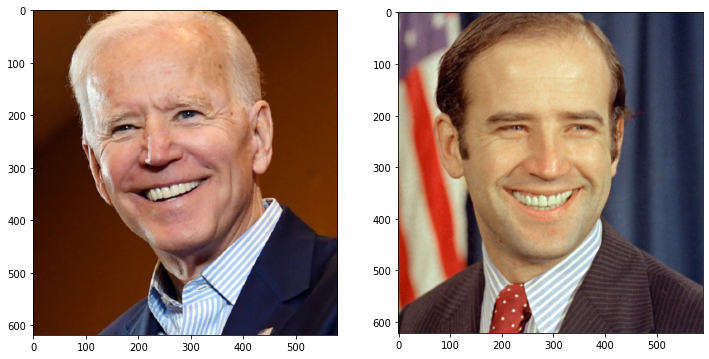

In [48]:
# show the images
# show the image
im1 = Image.open(fp_im1)
im2 = Image.open(fp_im2)
fig = plt.figure(figsize=(12,8))
fig.add_subplot(1,2,1)
plt.imshow(im1)
fig.add_subplot(1,2,2)
plt.imshow(im2)
plt.show()

In [47]:
result = DeepFace.verify(img1_path = fp_news, img2_path = fp_now)
t = "are probably" if result["verified"] else "are probably not"
print(f'These faces {t} the same person. Score: {result["distance"]}')

These faces are probably the same person. Score: 0.11270725799135406


In [40]:
result

{'verified': True,
 'distance': 0.11270725799135406,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

## Face Attributes

In [49]:
obj = DeepFace.analyze(img_path = fp_official, actions = ['age', 'gender', 'race', 'emotion'])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /Users/adam/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 10.8MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /Users/adam/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [01:06<00:00, 8.10MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /Users/adam/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:57<00:00, 9.38MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /Users/adam/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:22<00:00, 23.7MB/s] 
Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


In [51]:
print(obj)

{'age': 31, 'region': {'x': 102, 'y': 71, 'w': 375, 'h': 375}, 'gender': 'Man', 'race': {'asian': 0.07168174488469958, 'indian': 2.3455750197172165, 'black': 0.06190217682160437, 'white': 28.5081148147583, 'middle eastern': 51.68346166610718, 'latino hispanic': 17.329269647598267}, 'dominant_race': 'middle eastern', 'emotion': {'angry': 3.668234283669917e-11, 'disgust': 4.7858999952511334e-20, 'fear': 1.9539056495184445e-13, 'happy': 99.94928240473762, 'sad': 7.942477878340497e-10, 'surprise': 2.399143693491197e-07, 'neutral': 0.05071712960106907}, 'dominant_emotion': 'happy'}


In [60]:
# human readable version
t = f'The person in this photo is probably a {obj["age"]} year old {obj["dominant_race"]} {obj["gender"].lower()}.'
t += f' {"He" if obj["gender"] == "Man" else "She"} appears to be {obj["dominant_emotion"]}.'
print(t)

The person in this photo is probably a 31 year old middle eastern man. He appears to be happy.


## Try with your image

In [13]:
# im_selfie = ''
# obj = DeepFace.analyze(img_path = im_selfie, actions = ['age', 'gender', 'race', 'emotion'])
# t = f'The person in this photo is probably a {obj["age"]} year old {obj["dominant_race"]} {obj["gender"].lower()}.'
# t += f' {"He" if obj["gender"] == "Man" else "She"} appears to be {obj["dominant_emotion"]}.'